#Classification

<img src = "https://lh3.googleusercontent.com/5W9IABZ2Uz4iwWhVoGff9cY842LWXS4lYk-d7fieE4c8YYjUdovpvYnQ6ugM34qbmA" width = 800 >

# Business Scenarios:
1. Predict Sale of Prime Subscriptions -  Sales by city, date like on Black Friday
2. Predict Amazon Customers who will purchase Prime Subscription - Identify Target Customers
3. Content Recommendation

# Telecom Churn Prediction
<b>
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 
</b>

##Classification Problem
Classifying customers into a group of customers who will churn and customers who will not churn. 
### Learning Phase:
For any supervised Machine learning problem you use a historical data and Machine Learning Algorithm to build a model (a set of learned rules or a mathematical function with learned coefficients) which can help you to learn which kind of customers churn. 

<img src="http://storage.ning.com/topology/rest/1.0/file/get/2808372468?profile=original">

<b>Model</b>: A machine learning model can be a mathematical representation of a real-world process. 

<b> Target Variable or Label - Churn or not - is learnt using Features aka variables or columns like Gender, Age, Monthly Package etc.</b>

### Prediction Phase: 
You use the learned rules or the mathematical model on new customers data to predict whether they will churn or not.

### Basic Model building Pipeline
1. Obtain Data
2. Explore your data
3. Cleanse your data if required
4. Pre-processing: Preparing your data so that it is ready to use for training. This step also includes splitting your data into Training set and Validation set (Hold out set or Test set)
5. Build Machine Learning Model: Train an algorithm on your Training set
6. Evaluate your model by predicting on the test set and comparing the predicted label (churn or not) with actual label (churn or not) to see how well your model is able to learn from historical data and predict on unseen data


![image](https://i.imgur.com/OjFhLVs.png)

## Dataset:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).


1. customerID  : Customer ID
2. gender              : Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No)
6. tenure: Number of months the customer has stayed with the company
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No)

 
<b>The “Churn” column is our target.



# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from pprint import pprint



# Mount your Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Read Dataset from the drive

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/TechKnowSchool/Session 5/Copy of Telco-Customer-Churn.csv")

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
print('Data Shape',data.shape)
print('No. of Variables:', data.shape[1])
print('No. of Datapoints:', data.shape[0])

Data Shape (7043, 21)
No. of Variables: 21
No. of Datapoints: 7043


In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Descriptive analysis of the data

In [11]:
#Describe data for numerical variables only
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
#describe data for all types
data.describe(include =['object', 'float', 'int']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0537-QYZZN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# define a function to get unique categories from a column
def uni(columnname):
    print(columnname,"--" ,data[columnname].unique())

# make a dataframe which only has categorical variables
dataobject=data.select_dtypes(['object'])

# run the unique function for each column except the customer id
for i in range(1,len(dataobject.columns)):
    print(uni(dataobject.columns[i]))


gender -- ['Female' 'Male']
None
Partner -- ['Yes' 'No']
None
Dependents -- ['No' 'Yes']
None
PhoneService -- ['No' 'Yes']
None
MultipleLines -- ['No phone service' 'No' 'Yes']
None
InternetService -- ['DSL' 'Fiber optic' 'No']
None
OnlineSecurity -- ['No' 'Yes' 'No internet service']
None
OnlineBackup -- ['Yes' 'No' 'No internet service']
None
DeviceProtection -- ['No' 'Yes' 'No internet service']
None
TechSupport -- ['No' 'Yes' 'No internet service']
None
StreamingTV -- ['No' 'Yes' 'No internet service']
None
StreamingMovies -- ['No' 'Yes' 'No internet service']
None
Contract -- ['Month-to-month' 'One year' 'Two year']
None
PaperlessBilling -- ['Yes' 'No']
None
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
None
TotalCharges -- ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
None
Churn -- ['No' 'Yes']
None


# Cleaning the Data

## Convert TotalCharges Column(feature) to Numeric From Object ### 

In [14]:
# the usual code for converting strings to float but this fails because total charges column has blanks
data['TotalCharges']=data['TotalCharges'].astype(float)

ValueError: ignored

In [0]:
print("First 5 values and their frequency:\n",data['TotalCharges'].value_counts().head(5))

First 5 values and their frequency:
 20.2     11
         11
19.75     9
19.9      8
20.05     8
Name: TotalCharges, dtype: int64


In [15]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Preprocessing the data

## Encoding Categorical variables
scikit-learn algorithms generally need the columns or variables to be numeric.
Various techniques to do encodings:
1. <b>Label Encoder</b>: Convert every category into a numeric label. This is the most basic encoding technique.
2. <b>One hot encoding</b>: convert each category into a column with binary values.
3. <b>Hashing Trick</b>: works by applying a hash function to the features and using their hash values as indices directly. Read more about it from here:
https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f
4. <b>Entity Embeddings</b> -  an embedding is a mapping of a categorical variable into an n-dimensional vector. Very recent technique, uses ML to learn the encodings for each categories. Used heavily by Kaggle competition winners. Check out Rossman Sales competition. Follow this link for more info: https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9

In [0]:
# make a dataframe which only has categorical variables
dataobject=data.select_dtypes(['object'])

# Label encoding function
def labelencode(columnname):
    data[columnname] = LabelEncoder().fit_transform(data[columnname])

# applying the function to each column except the customerID
for i in range(1,len(dataobject.columns)):
    labelencode(dataobject.columns[i])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

In [19]:
for i in range(1,len(dataobject.columns)):
     print(uni(dataobject.columns[i]))

gender -- [0 1]
None
Partner -- [1 0]
None
Dependents -- [0 1]
None
PhoneService -- [0 1]
None
MultipleLines -- [1 0 2]
None
InternetService -- [0 1 2]
None
OnlineSecurity -- [0 2 1]
None
OnlineBackup -- [2 0 1]
None
DeviceProtection -- [0 2 1]
None
TechSupport -- [0 2 1]
None
StreamingTV -- [0 2 1]
None
StreamingMovies -- [0 2 1]
None
Contract -- [0 1 2]
None
PaperlessBilling -- [1 0]
None
PaymentMethod -- [2 3 0 1]
None
Churn -- [0 1]
None


In [0]:
df=data.copy()

## Removing ID columns

In [0]:
unwantedcolumnlist=["customerID"]
df = df.drop(unwantedcolumnlist, axis=1)

## Variables or Features or Columns to consider for Model Building

In [35]:
features = df.drop(["Churn"], axis=1).columns
print(features)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


## Splitting Data into Train and Validation set

<b>Usually we split Train and Validation in 70-30% split

Another way to split is dividing in Train, Validation and Test set in 70-15-15% split

In [0]:
df_train, df_val = train_test_split(df, test_size=0.30, random_state = 42)

In [29]:
print("Rows and columns for Train:",df_train.shape)
print("Rows and columns for Test",df_val.shape)

Rows and columns for Train: (4930, 20)
Rows and columns for Test (2113, 20)


## Missing Value Imputation
If you are using any descriptive stat to do missing value imputation, its best to do after you have split the data into train and test, to prevent data leakage.
Do it after split the data so mean is calculated only for train/test dataset not for whole dataset.

In [31]:
df_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

### Train and Validation Missing Data Fill by mean(imputation) ###

In [32]:
df_train['TotalCharges'].fillna(df_train['TotalCharges'].mean(), inplace=True)
df_val['TotalCharges'].fillna(df_val['TotalCharges'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Model Building and Training

In [34]:
# Initialise Decision tree
clf = DecisionTreeClassifier(random_state=42) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf.fit(df_train[features], df_train["Churn"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Predict on Validation set

# Make predictions on validation set



In [36]:
# Make predictions
predictions = clf.predict(df_val[features])
# 
pd.DataFrame(data = {'Actual Label':df_val['Churn'], 'Predicted Label':predictions})

,Actual Label,Predicted Label
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


# Model Evaluation and Performance Metrics
##1. Confusion Matrix: 
A table of True Positive, True Negative, False Positives, False Negatives


![](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png) 

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

In [38]:
print(confusion_matrix(df_val["Churn"],predictions))
tn, fp, fn, tp = confusion_matrix(df_val["Churn"],predictions).ravel()
print('True Negative:', tn, 'False Positive:', fp)
print('False Negative:', fn,'True Positive:', tp)


[[1270  269]
 [ 293  281]]
True Negative: 1270 False Positive: 269
False Negative: 293 True Positive: 281


<img src="https://i.imgur.com/tumwXxA.png" width="500" align = "middle" >


##2. Accuracy:
<img src="https://i.imgur.com/4Ww8AdQ.png" width="700">

In [39]:
score = clf.score(df_val[features], df_val["Churn"])
print("Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer churned or not")

Accuracy:  0.73403
73.40% times correctly predicted whether the customer churned or not


## 3. Precision and Recall:
<img src="https://i.imgur.com/VIIKxyd.png" width = 700>

<img src="https://i.imgur.com/WxL92cP.png" width = 700>


In [40]:
print(classification_report(df_val['Churn'], predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



# Decision Tree Visualisation

In [0]:
print(dot_data)

In [41]:
dot_data = tree.export_graphviz(clf,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

## Tree Pruning

In [43]:
# Change the value to 3 and 6, check the recall and accuracy
clf = DecisionTreeClassifier(random_state=42,max_depth = 3)
clf.fit(df_train[features], df_train["Churn"])
predictions = clf.predict(df_val[features])
print(confusion_matrix(df_val["Churn"],predictions))
print(classification_report(df_val["Churn"],predictions))
score = clf.score(df_val[features], df_val["Churn"])
print("Accuracy: ", round(score,3))

[[1403  136]
 [ 336  238]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1539
           1       0.64      0.41      0.50       574

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113

Accuracy:  0.777


In [44]:
df_train.Contract.value_counts()

0    2690
2    1186
1    1054
Name: Contract, dtype: int64

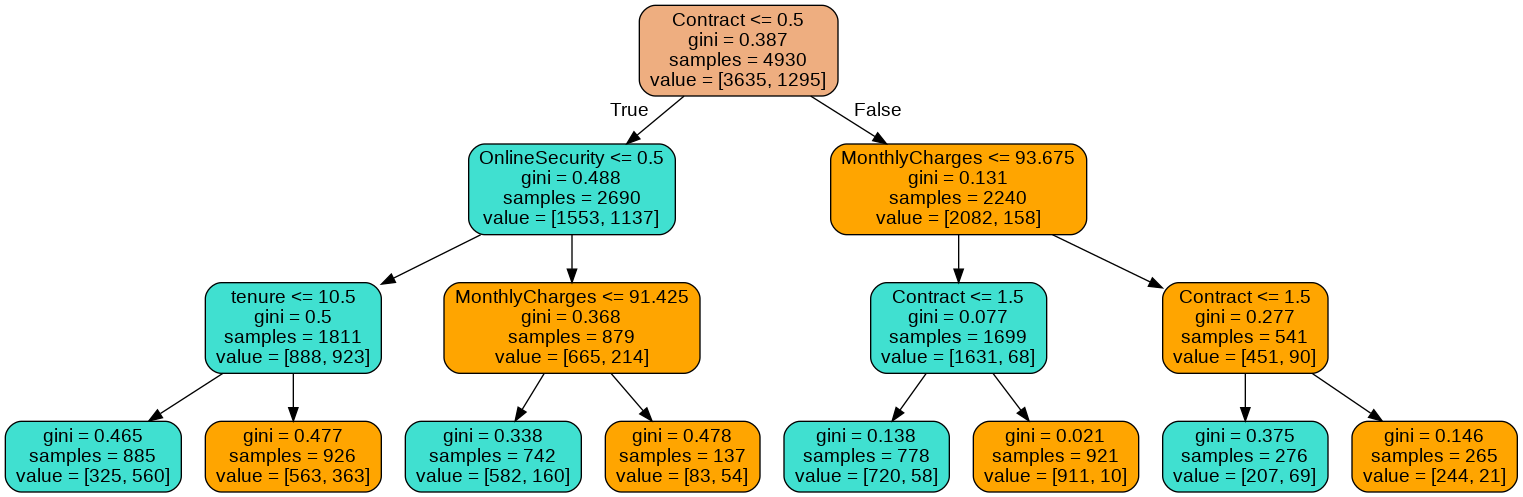

In [0]:
dot_data = tree.export_graphviz(clf,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

Image(graph.create_png())

Other ways to visualise decision trees:
https://explained.ai/decision-tree-viz/

# Random Forest

In [0]:
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = None)
                          
clf.fit(df_train[features], df_train["Churn"])

# Make predictions
predictions = clf.predict(df_val[features])
probs = clf.predict_proba(df_val[features])

In [46]:
score = clf.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["Churn"],predictions))
print(classification_report(df_val["Churn"],predictions))

Accuracy:  0.7851396119261713
[[1379  160]
 [ 294  280]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1539
           1       0.64      0.49      0.55       574

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.77      0.79      0.78      2113



## Parameter Tuning

1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)
7. max_leaf_nodes = max number of leaves in each decision tree

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
# Initialise Random Forest
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = None
                             ,max_leaf_nodes = 30)
# Fit on training data
clf.fit(df_train[features], df_train["Churn"])

# Make predictions
predictions = clf.predict(df_val[features])

# Performance measures
score = clf.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["Churn"],predictions))
print(classification_report(df_val["Churn"],predictions))

Accuracy:  0.8026502602934217
[[1397  142]
 [ 275  299]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



### Grid Search to Tune Parameters

In [50]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': [2,3,4, 5, 6,7,8,9],
    'max_leaf_nodes':[10,20,30],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
pprint(param_grid)

{'bootstrap': [True],
 'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
 'max_leaf_nodes': [10, 20, 30],
 'n_estimators': [100, 500, 1000]}


In [51]:
# Fit the grid search to the data
grid_search.fit(df_train[features], df_train["Churn"])
pprint(grid_search.best_params_)



Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.1min finished


{'bootstrap': True,
 'max_features': 3,
 'max_leaf_nodes': 20,
 'n_estimators': 100}


In [0]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(df_val[features])

# Performance measures
score = best_grid.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["Churn"],predictions))
print(classification_report(df_val["Churn"],predictions))

<b>Task: Train RandomSearch from scikit learn on this data

# Feature Importance

In [47]:
feat_imp = pd.Series(best_grid.feature_importances_, index=features, name='Feature importances') \
                .sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,4), title='Feature importances')
plt.xlabel('Features'), plt.ylabel('Importance');
feat_imp.head()

NameError: ignored

# Further Learning
1. Use One Hot encoding to encode categorical variables and train random forest over it
2. Use Random Search followed by Grid search to find optimal Parameters for training your random Forest
3. Train LightGBM algorithm and see if you can beat the accuracy.

# Important Things that were not covered
1. How Random Forests decide on which feature is important. Read this: https://blog.datadive.net/selecting-good-features-part-iii-random-forests/
2. Linear Classifiers like Logistic regression, SVMs
Read: Introduction To Statistical Learning to get more insight into these simple algortihms and how to use them http://faculty.marshall.usc.edu/
gareth-james/ISL/
3. Boosting Algorithms: XGBoost, ADABoost, Gradient Boosting, LightGBM (Competition winner Algorithms)
4. Some helpful websites: https://chrisalbon.com/
